<a href="https://colab.research.google.com/github/ShehabMMohamed/TensorFlow-Tutorials/blob/main/Neural_Network_for_Fashion_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://drive.google.com/uc?export=view&id=1hfbuF6jpHNjw8I_LAIj5VCQIpe12VAZW)



**Neural Networks Crash Course**


A Neural Network is a supervised machine learning algorithm that uses a layered representation of data to learn its features for prediction or classification tasks. It is an algorithm that attempts to mimick the human brain behvaiour through creating an artificial network composed of neurons and weights that learns patterns or features of the data from simple to complex ones.

**Neuron** sums all the input weights by their inputs, adds a constant (bias) to it and then passes them through an activation function to capture non-linearity between the features.

**Activation Function:** to introduce complexity into our neural network. We use activation functions in our layers to introduce non-linearity to capture the features in different dimensions)

The activation function of a neuron is 

```
Neuron = f(X.W + b)
```
**Different Activation Functions**


**Sigmoid Function:** takes a real value and squashes it to range between 0 and 1.

**Tanh Function:** takes a real value and squashes it to range between -1 and 1.

**Rectified Linear Unit (RELU):** takes a real value and thresholds it at zero. Value is between 0 and infinity.


**Softmax Function:** used in classification tasks, provides a probability score based on which prediction has highest confidence.


**Two Types of Feed Forward Networks (FF Networks):**

1- Single-Layer Perceptron: No hidden layers, learns linear functions.

2- Multi-Layer Perceptron: has one or more hidden layer, learns linear and non-linear functions.



**Loss/Cost Function** - How bad/good the network was?

We use a loss/cost function to compute the error of the network. And based on the error, we change the weights of the networks to adjust to the output such that the network outputs with lower error next time. Basically learn through the weights.

List of Loss Functions:

1- MSE (Mean Squared Error)

2- MAE (Mean Absolute Error)

3- Hinge Loss (SVM Loss)

4- Cross Entropy Loss

Many more...


Gradient Descent: the algorithm used to find the optimal parameters (weights and biases) for out network. We compute the gradient and find the direction in which the gradient is approaching the optimal point. The gradient is the derivative of the cost function.

Backpropagation: the process of calculating the gradient that is used in the gradient descent step.

We calculate what its called a gradient, which is the direction we need to move to minimize the loss/cost function.

Optimizer: the algorithm that implements the backpropagation algorithm
- Gradient Descent
- Stocashtic Gradient Descent (SGD)
- Mini-Batch Gradient Descent (mini SGD)
- Momentum
- Nestrov Accelerated Descent
- Adam

Google Collaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in cloud.


We do not need to install the libraries for these examples since they are pre-installed in the cloud environment, so we will start importing them. 

We are going to build and train a Neural Network that classifies images of 28x28 pixels to different clothes using Fashion MNIST dataset.

In [ ]:
import tensorflow as tf           # our deep learning library
from tensorflow import keras      # keras is now part of TensorFlow 2.0
import numpy as np                # for optimized matrix multiplication.
import matplotlib.pyplot as plt   # for data analysis/visualization.

Fashion MNIST dataset is one of many Keras datasets publicly available in Tensorflow https://www.tensorflow.org/api_docs/python/tf/keras/datasets. We are importing it from keras.datasets.
The dataset consists of 60,000 images that we will use for training, and 10,000 images for testing.

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist # 60,000 images, 10,000 images for validation/testing
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


**Shape of the training data**

Each image is a 28x28 Pixel. If we flatten the image to a 1D array, we can represent an input image as a 1D array of 784 datapoints.

Training data has 60,000 images

Testing data has 10,000 images


`type(train_images)` would give you that this is a n-dimensional array or in short ndarray

`train_images.shape` would give you that it is a numpy array of shape (60000, 28, 28)

In [ ]:
print(train_images.shape)    # Shape 
type(train_images)    # Type ndarray

(60000, 28, 28)


numpy.ndarray

Printing 10x10 pixels (Top Left) of Train Image # 16

In [ ]:
img_i = 16
train_images[img_i,:10,:10]     # :10 means we are slicing and getting the first 10 values.

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  53],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 117],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 127],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 165],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 185],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 200],
       [  0,   0,   0,   0,   0,   0,   0,   0,   7, 213],
       [  0,   0,   0,   0,   0,   0,   0,   0,  25, 201],
       [  0,   0,   0,   0,   0,   0,   0,   0,  42, 195],
       [  0,   0,   0,   0,   0,   0,   0,   0,  50, 184]], dtype=uint8)

In [ ]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In this problem, our dataset has 10 labels or classes, each image in the training data has its label (ground truth) and we want to take a testing image and give it a label (prediction).

In [ ]:
class_names = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

This function is for visualization, we take an id of an image from our 60,000 training images and we show the actual image with its label.

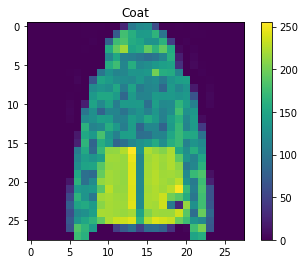

In [ ]:
def show_image_and_label(id):
  plt.figure()
  plt.imshow(train_images[id])
  plt.title(class_names[train_labels[id]])
  plt.colorbar()
  plt.grid(False)
  plt.show()
show_image_and_label(22)

We can preprocess our data further by normalizing our images.

Since the datapoints are pixels of range 0 to 255 we can scale them down by dividing 255.0.

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

This part is creating a 3-layered neural network by stacking the layers on top of each other.

We use the Sequential API of keras and provide an array of layers, where the first layer is in the input layer, the second layers is the hidden layer, and the third layer is the output layer.


We Defined the Architecture of our Neural Network, we defined the amount of neurons in each layer and the activation functions.

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),   # input layer (1)
                          keras.layers.Dense(128, activation='relu'),   # hidden layer (2)
                          keras.layers.Dense(10, activation='softmax')  # output layer (3)
])

In [ ]:
model.summary()     # provides us the current architecture of our neural network.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Next we need to compile our model.


Compile the Model: We need to define the loss/cost function, optimizer, and metrics we would like to observe/track. 


Changing the loss/cost function, optimizer is part of what we cann "Hyperparameter Tuning". We are tweaking our architecture to observe its performance whether the accuracy will increase or decrease.


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Epoch: a single iteration on the entire training data.

In [ ]:
model.fit(train_images, train_labels, epochs=10)      # Start Training the model.

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5025 - accuracy: 0.8241
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3774 - accuracy: 0.8658
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3374 - accuracy: 0.8785
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3138 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2988 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2687 - accuracy: 0.9009
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2578 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2487 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.241

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)   

print("Test Accuracy:", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3336 - accuracy: 0.8848
Test Accuracy: 0.8848000168800354


In [ ]:
test_images.shape

(10000, 28, 28)

**Testing an Image**

Our model now is trained and has the weights of Accuracy ~90%. We can use this model to classify a testing image.

Predicted Label: Shirt | Actual Label: Shirt


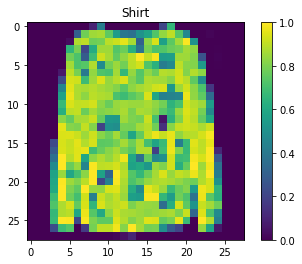

In [ ]:
def test_image(id):
  prediction = model.predict(np.array([test_images[id]]))
  class_index = np.argmax(prediction)
  plt.figure()
  plt.imshow(test_images[id])
  plt.title(class_names[test_labels[id]])
  print("Predicted Label: {0} | Actual Label: {1}".format(class_names[class_index], class_names[test_labels[id]]))
  plt.colorbar()
  plt.show()

test_image(193)   